In [322]:
# Question 10
import pandas as pd
import numpy as np
import seaborn as sns #visualization library
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm #to compute p-values
from patsy import dmatrices
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda #linear discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda #quadratic discriminant analysis
from sklearn.neighbors import KNeighborsClassifier as knn #K nearest neighbours (KNN)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [199]:
df = pd.read_csv('Weekly.csv',index_col=0)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [200]:
df.reset_index(level=0, inplace=True)
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [201]:
df["Direction"].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

In [202]:
# 10(a)
df.describe() #descriptive statistics

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [203]:
df.corr() #correlation matrix
# Finding: correlation b/w Year and Volume.

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


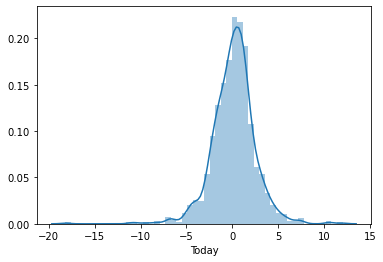

In [204]:
sns.distplot(df['Today']);

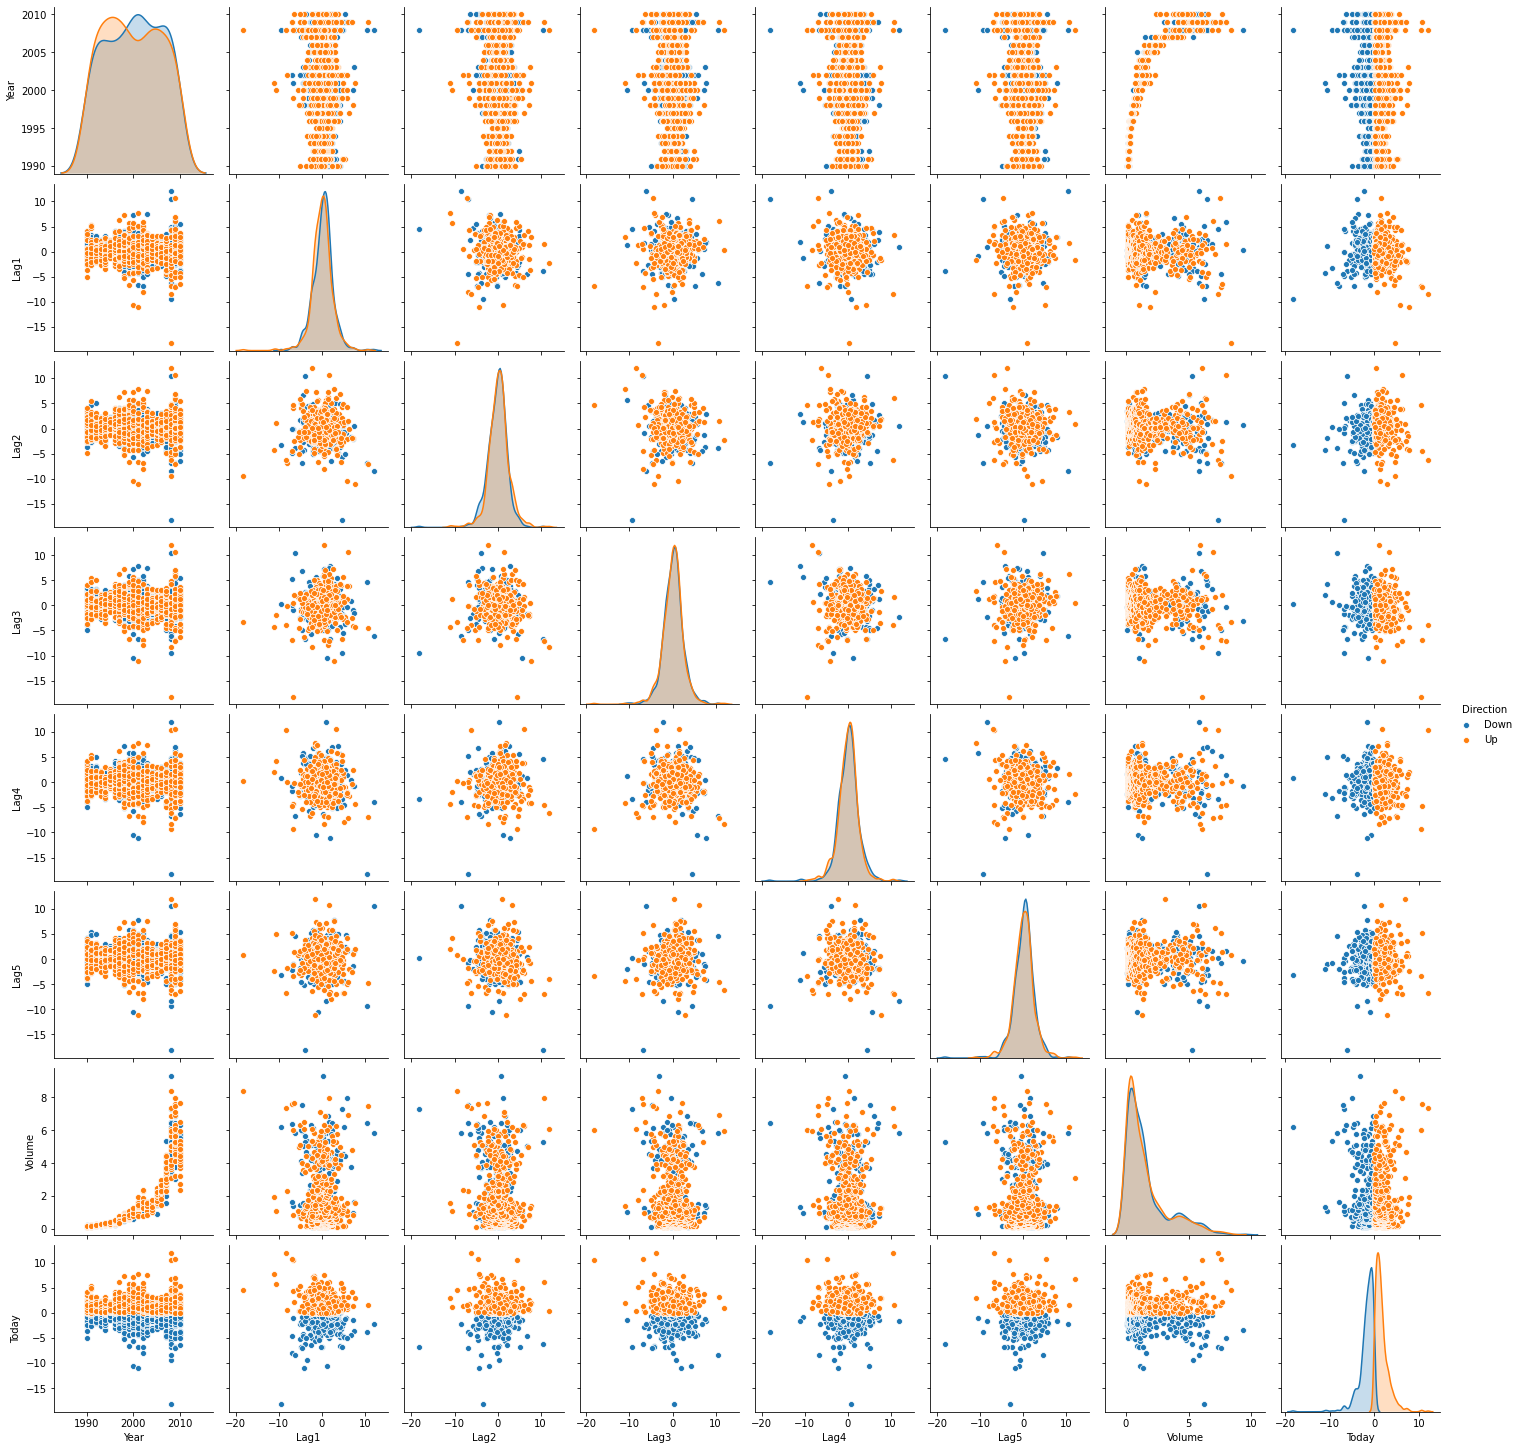

In [205]:
sns.pairplot(df, hue = 'Direction');
# only year and volume has some pattern

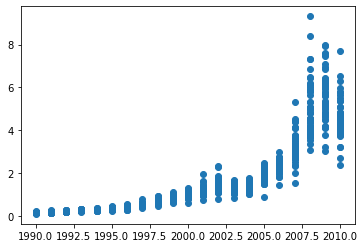

In [206]:
plt.scatter(df['Year'], df['Volume']);

In [207]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [208]:
train_cols = ['Lag1','Lag2','Lag3','Lag4','Lag5','Volume'] #independent var. considered in the logistic model
lr = LogisticRegression()
mod = lr.fit(df[train_cols], df['Direction'])

In [209]:
mod.coef_

array([[-0.04123854,  0.05840384, -0.01605138, -0.02776243, -0.01446302,
        -0.02270963]])

In [210]:
mod.intercept_

array([0.26680422])

In [211]:
# 10(b): Logistic Regression
y = (df["Direction"] == "Up").astype("int64") # y variable
x = sm.add_constant(df.drop(columns = ["Direction", "Year", "Today"])) # x variable
logit_mod = sm.Logit(y, x) 
logit_res = logit_mod.fit()
print(logit_res.summary())
# Findings: only Lag 2 looks statistically significant.

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                0.006580
Time:                        04:55:05   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

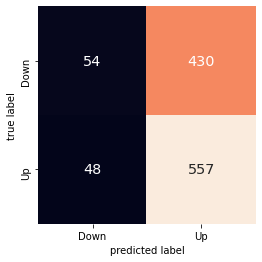

In [212]:
# 10(c) In order to produce a confusion matrix that helps us better visualize the incorrect predictions, we use seaborn to convert the confusion matrix into a heatmap.
mat = pd.DataFrame(logit_res.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");
# annot means numbers in box, cbar means bar on right side (its not there since its marked 'False')

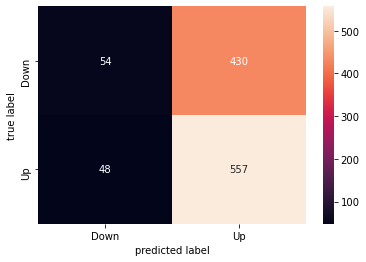

In [213]:
mat = pd.DataFrame(logit_res.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, ax = ax, fmt = "g")
ax.set(xlabel = "predicted label", ylabel = "true label");

In [214]:
(557+54)/1089

0.5610651974288338

In [215]:
logit_pred = pd.Series(logit_res.predict()).apply(lambda x: "Up" if (x>0.5) else "Down")
(logit_pred == df['Direction']).mean()

0.5610651974288338

In [216]:
# While this seems to be better than random chance, it is important to note that the model was trained on the entire data set, so 0.5611 is the training accuracy.

In [217]:
# 10(d)
train_data = (df['Year'] < 2009)

In [218]:
y = (df.loc[train_data, 'Direction']=='Up').astype("int64")
x = sm.add_constant(df.loc[train_data, 'Lag2'])
logit_mod = sm.Logit(y,x)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                0.003076
Time:                        04:55:11   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [219]:
test_x = sm.add_constant(df.loc[~train_data, 'Lag2'])
test_y = df.loc[~train_data, 'Direction']
logit_test_prob = logit_res.predict(test_x)
logit_test_pred = pd.Series(logit_test_prob).apply(lambda x: "Up" if (x>0.5) else "Down")


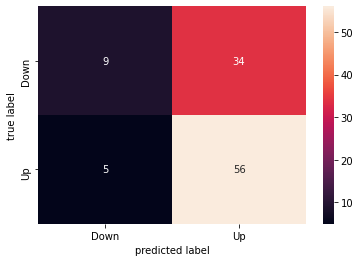

In [221]:
mat = pd.DataFrame(confusion_matrix(test_y, logit_test_pred), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, ax = ax, fmt = "g")
ax.set(xlabel = "predicted label", ylabel = "true label");

In [222]:
(df.loc[~train_data, "Direction"] == "Up").mean()
# Findings: If we predict that every week will be an up week.

0.5865384615384616

In [223]:
(logit_test_pred == df.loc[~train_data, "Direction"]).mean()
# Findings: the model correctly predicted the market direction for 62.5%. It is less than a 10% improvement over naively predicting that every week will be an up week.

0.625

In [224]:
# 10(e): LDA

# First separate out the training and test sets
train_x = df.loc[train_data, 'Lag2'].to_frame() # The to_frame() function is used to convert Series to DataFrame.
train_y = df.loc[train_data, 'Direction']
test_x  = df.loc[~train_data, 'Lag2'].to_frame()
test_y  = df.loc[~train_data, 'Direction']
# Fit the LDA model using the training set
lda_clf = lda()
lda_clf.fit(train_x, train_y)

LinearDiscriminantAnalysis()

[Text(33.0, 0.5, 'Actual'), Text(0.5, 15.0, 'predicted')]

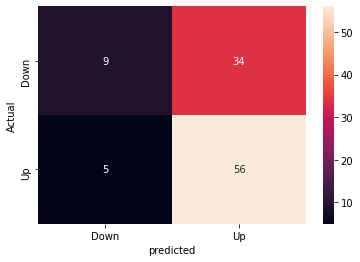

In [225]:
x_pred = lda_clf.predict(test_x)
mat = confusion_matrix(test_y, x_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, ax=ax, xticklabels = lda_clf.classes_, yticklabels = lda_clf.classes_);
ax.set(xlabel = "predicted", ylabel = "Actual")

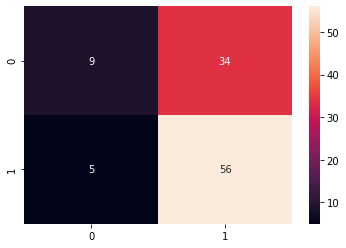

In [226]:
sns.heatmap(mat, annot = True);

In [227]:
lda_clf.score(test_x,test_y)
# Findings: LDA accurancy is 62.5%. While this is better than chance, it still is less than a 10% improvement over naively predicting that every week will be an up week. 


0.625

In [228]:
# 10(f): QDA
# First separate test and train dataset: already done at 10(e)
# Fit QDA model
qda_clf = qda()
qda_clf.fit(train_x, train_y)

QuadraticDiscriminantAnalysis()

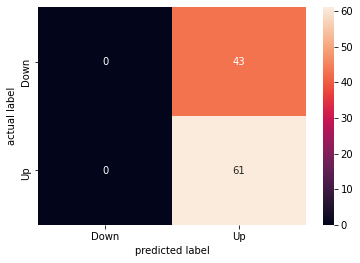

In [229]:
x_pred = qda_clf.predict(test_x)
mat = confusion_matrix(test_y, x_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, xticklabels = qda_clf.classes_, yticklabels = qda_clf.classes_);
ax.set(xlabel = "predicted label", ylabel = "actual label");

In [230]:
qda_clf.score(test_x, test_y)
# Findings: While this is better than chance, it is the same result one would get from naively predicting that every week will be an up week, 
# so to better compare the performance of this model to the logistic regression and linear discriminant analysis models testing on a larger test set would be necessary.


0.5865384615384616

In [233]:
# 10(g): KNN with K = 1
# First separate out the training and test sets: already done in 10(e)

# Set NumPy random seed for consistency and reproducibility of our results
np.random.seed(312)

# Fitting the model
knn_1_clf = KNeighborsClassifier(n_neighbors = 1)
knn_1_clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=1)

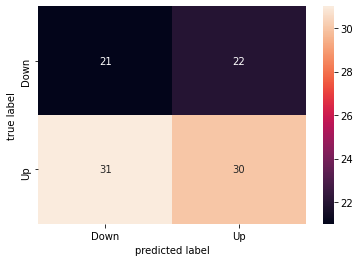

In [234]:
x_pred = knn_1_clf.predict(test_x)
mat = confusion_matrix(test_y, x_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, xticklabels = knn_1_clf.classes_, yticklabels = knn_1_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [235]:
knn_1_clf.score(test_x,test_y)

0.49038461538461536

In [236]:
# 10(h): Logistic Regression and LDA were equally good followed by qda and then knn(k=1)

In [237]:
# 10(j): Lets try weighted avg. of lag variable instead of just lag variables
weighted_lag = 0.6*df['Lag1']+ 0.2*df['Lag2'] + 0.2*df['Lag3'] + 0*df['Lag4'] + 0*df['Lag5']
# Note: these weight are assigned by guess work and reason for decreasing order is that recent weeks might be more-related to the direction of the current week than weeks that are further in the past.
df["weighted_lag"] = weighted_lag
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,weighted_lag
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0.0168
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0.3156
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,-1.4364
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1.5392
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,0.6148


In [238]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,weighted_lag
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.048884
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,0.909872
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.213363
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,0.335930
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.070421
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.011072
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.106655
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,-0.072352
weighted_lag,-0.048884,0.909872,0.213363,0.335930,-0.070421,-0.011072,-0.106655,-0.072352,1.000000


In [239]:
# Logistic Regression
y = (df.loc[train_data,'Direction']=='Up').astype("int64")
x = sm.add_constant(df.loc[train_data, "weighted_lag"])
logit = sm.Logit(y,x)
logit_res = logit.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.686604
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                0.001551
Time:                        04:56:19   Log-Likelihood:                -676.30
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                    0.1472
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2183      0.064      3.388      0.001       0.092       0.345
weighted_lag    -0.0632

In [240]:
test_x = sm.add_constant(df.loc[~train_data, "weighted_lag"])
test_y = df.loc[~train_data, "Direction"]
logit_prob  = logit_res.predict(test_x)
logit_pred  = pd.Series(logit_prob).apply(lambda x: "Up" if x > .5 else "Down")

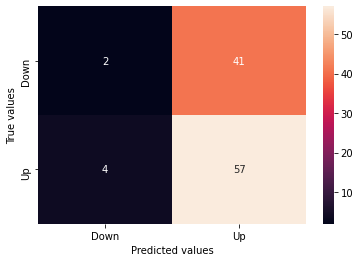

In [241]:
mat = pd.DataFrame(confusion_matrix(test_y, logit_pred))
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, xticklabels = lda_clf.classes_, yticklabels = lda_clf.classes_);
ax.set(xlabel = "Predicted values", ylabel = "True values");

In [242]:
(df.loc[~train_data, "Direction"] == "Up").mean()
# what we will achieve by predicting that every week will be an up week.

0.5865384615384616

In [243]:
(logit_pred == df.loc[~train_data, "Direction"]).mean() 
# it is less than what we will achieve by predicting that every week will be an up week.

0.5673076923076923

In [244]:
train_x = df.loc[train_data, 'weighted_lag'].to_frame() # The to_frame() function is used to convert Series to DataFrame.
train_y = df.loc[train_data, 'Direction']
test_x  = df.loc[~train_data, 'weighted_lag'].to_frame()
test_y  = df.loc[~train_data, 'Direction']
lda_clf = lda()
lda_clf.fit(train_x, train_y)

LinearDiscriminantAnalysis()

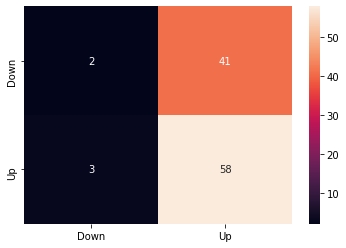

In [245]:
x_rep = lda_clf.predict(test_x)
mat = confusion_matrix(test_y, x_rep)
sns.heatmap(mat, annot = True, xticklabels = lda_clf.classes_, yticklabels = lda_clf.classes_);

In [246]:
lda_clf.score(test_x, test_y)

0.5769230769230769

In [247]:
np.random.seed(322)
knn_3_clf = KNeighborsClassifier(n_neighbors = 3)
knn_3_clf.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=3)

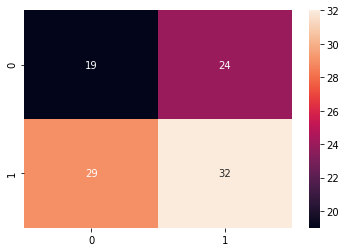

In [248]:
x_rep = knn_3_clf.predict(test_x)
mat = confusion_matrix(test_y, x_rep)
sns.heatmap(mat, annot = True);

In [249]:
knn_3_clf.score(test_x,test_y)

0.49038461538461536

In [250]:
np.random.seed(319)
knn_2_clf = KNeighborsClassifier(n_neighbors = 2)
knn_2_clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=2)

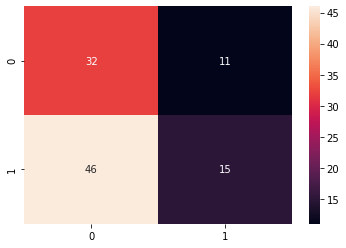

In [251]:
x_rep = knn_2_clf.predict(test_x)
mat = confusion_matrix(test_y, x_rep)
sns.heatmap(mat, annot = True);

In [252]:
knn_2_clf.score(test_x, test_y)

0.4519230769230769

In [332]:
# Question 11
df = pd.read_csv("Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [333]:
# Origin column is categorical but records integer value here. Thus, lets convert it first.
df["origin"] = df["origin"].map({1: "American", 2:"European", 3:"Japanese"})
# The map() function executes a specified function for each item in an iterable. The item is sent to the function as a parameter.
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino


In [334]:
# 11(a)
df['mpg'].median()

23.0

In [335]:
df["mpg01"] = (df["mpg"]> df["mpg"].median()).map({False: 0, True: 1 })
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino,0


In [336]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,American,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,European,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,American,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,American,ford ranger,1


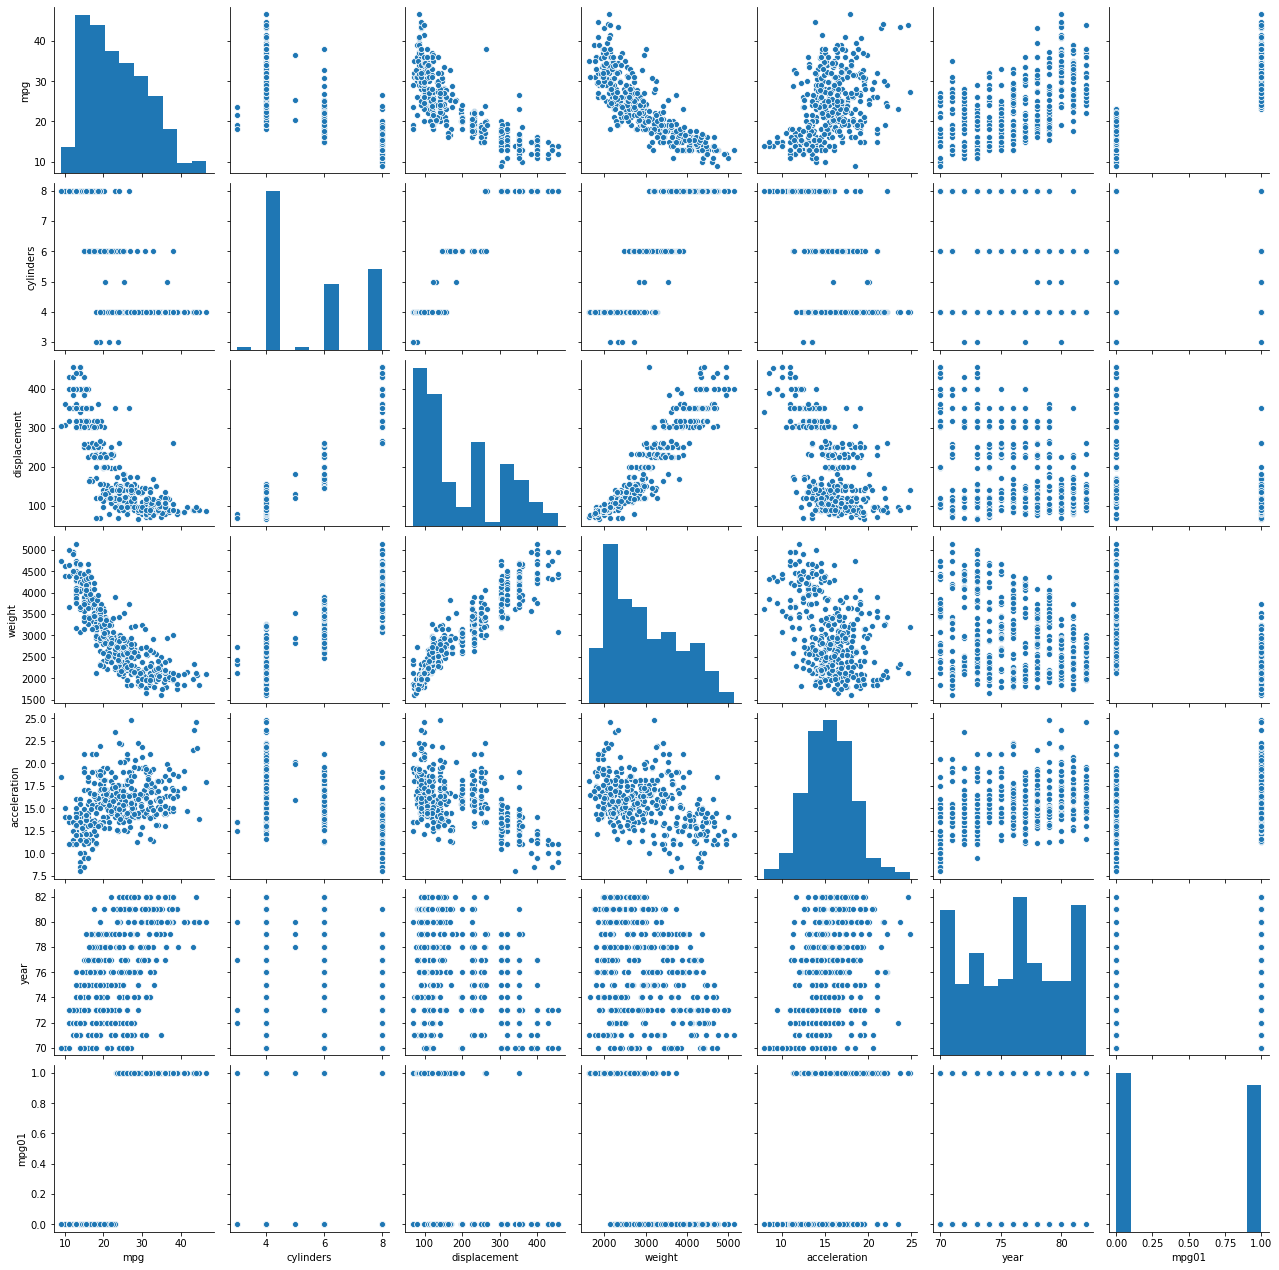

In [258]:
# 11(b)
sns.pairplot(df)

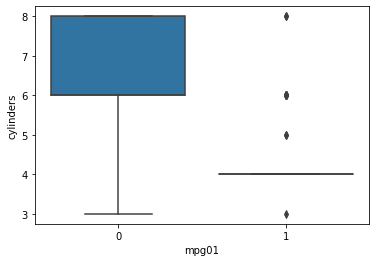

In [259]:
sns.boxplot(x = "mpg01", y="cylinders", data = df);


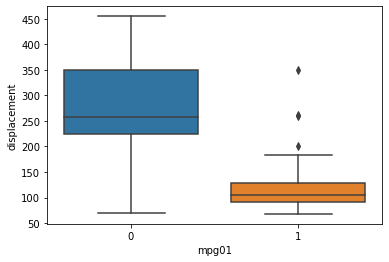

In [260]:
sns.boxplot(x = "mpg01", y="displacement", data = df);


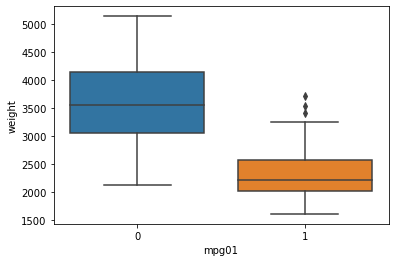

In [261]:
sns.boxplot(x = "mpg01", y="weight", data = df);


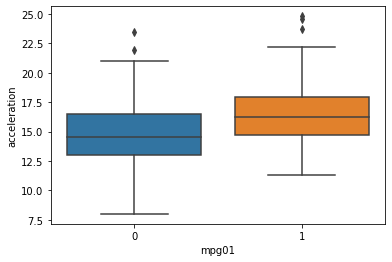

In [262]:
sns.boxplot(x = "mpg01", y="acceleration", data = df);



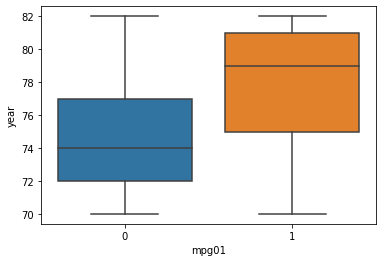

In [263]:
sns.boxplot(x = "mpg01", y="year", data = df);

In [337]:
df.corr()
# Findings: Several variables are highly correlated to mpg01 especially cylinders, displacement and weight.
# We take these 3 variables as most associated with mpg01 for the rest of quesiton.

,mpg,cylinders,displacement,weight,acceleration,year,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.838239
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.740327
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.738607
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.322629
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.454108
mpg01,0.838239,-0.740327,-0.738607,-0.745734,0.322629,0.454108,1.000000


In [338]:
# 11(c)
np.shape(df)

(397, 10)

In [339]:
x = df[['cylinders', 'displacement', 'weight']] # double brackets necessary
y = df['mpg01']
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state=1) 

In [340]:
# 11(d)
lda_clf = lda()
lda_clf.fit(train_x, train_y)
accuracy_score(test_y, lda_clf.predict(test_x))

0.89

In [341]:
# Alternatively
lda_clf.score(test_x, test_y)

0.89

In [342]:
# 11(e)
qda_clf = qda()
qda_clf.fit(train_x, train_y)
accuracy_score(test_y, qda_clf.predict(test_x))

0.88

In [343]:
# Alternatively
qda_clf.score(test_x, test_y)

0.88

In [344]:
# 11(f)
logit = LogisticRegression()
logit.fit(train_x, train_y)
logit.score(test_x,test_y)

0.87

In [345]:
accuracy_score(test_y, logit.predict(test_x))

0.87

In [346]:
# 11(g)
knn_1 = knn(n_neighbors = 1)
knn_1.fit(train_x, train_y)
knn_1.score(test_x,test_y)

0.9

In [347]:
for k in range(1,100):
    knn_classes = knn(n_neighbors = k)
    knn_classes.fit(train_x, train_y)
    acc = knn_classes.score(test_x,test_y)
    print('K = {:3}, accuracy = {:.4f}'.format(k, acc))  # here, {:3} denotes gap between K= and number, {.4f} denotes 4 decimal places. You can leave those brackets blank also.
# Finding: Best value of K is 3.

K =   1, accuracy = 0.9000
K =   2, accuracy = 0.8800
K =   3, accuracy = 0.9100
K =   4, accuracy = 0.8900
K =   5, accuracy = 0.8700
K =   6, accuracy = 0.8900
K =   7, accuracy = 0.9000
K =   8, accuracy = 0.9100
K =   9, accuracy = 0.8900
K =  10, accuracy = 0.8900
K =  11, accuracy = 0.8900
K =  12, accuracy = 0.8800
K =  13, accuracy = 0.8900
K =  14, accuracy = 0.8900
K =  15, accuracy = 0.8900
K =  16, accuracy = 0.8900
K =  17, accuracy = 0.8700
K =  18, accuracy = 0.8900
K =  19, accuracy = 0.8800
K =  20, accuracy = 0.8900
K =  21, accuracy = 0.8900
K =  22, accuracy = 0.8900
K =  23, accuracy = 0.8800
K =  24, accuracy = 0.8800
K =  25, accuracy = 0.8800
K =  26, accuracy = 0.8800
K =  27, accuracy = 0.8800
K =  28, accuracy = 0.8800
K =  29, accuracy = 0.8800
K =  30, accuracy = 0.8800
K =  31, accuracy = 0.8800
K =  32, accuracy = 0.8900
K =  33, accuracy = 0.8900
K =  34, accuracy = 0.8900
K =  35, accuracy = 0.8700
K =  36, accuracy = 0.8800
K =  37, accuracy = 0.8700
K

In [348]:
# Question 12(a)
def Power():
    print(2**3)
Power()

8


In [349]:
# 12(b)
def Power2(x,a):
    print(x**a)

In [350]:
Power2(3,8)

6561


In [351]:
# 12(c)
Power2(10,3)

1000


In [352]:
Power2(8,17)

2251799813685248


In [353]:
Power2(131,3)

2248091


In [354]:
# 12(d)
def Power3(x,a):
    return(x**a)

In [355]:
result = Power3(2,5)

In [356]:
result

32

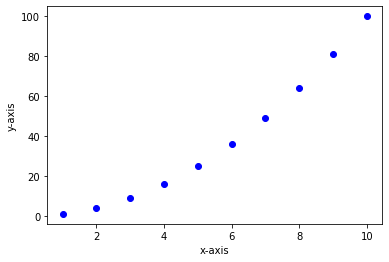

In [357]:
# 12(e)
x = list(range(1,11))
y = [Power3(i,2) for i in x]
fig, ax = plt.subplots()
ax.plot(x,y, "bo");  # "bo" brings dotted line instead of a plane line.
ax.set(xlabel = "x-axis", ylabel = "y-axis");

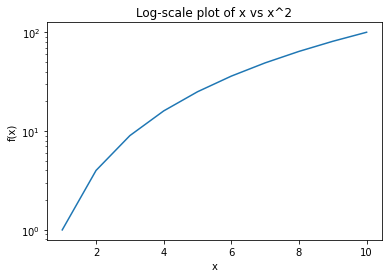

In [358]:
x = list(range(1, 11))
y = [Power3(i, 2) for i in x]
fig, ax = plt.subplots()
ax.semilogy(x, y)
ax.set(xlabel = "x", ylabel = "f(x)", title = "Log-scale plot of x vs x^2");


In [359]:
# 12(f)
def PlotPower(x, a, x_scale = None, y_scale = None):
    y = [Power3(i, a) for i in x]
    fig, ax = plt.subplots()
    ax.plot(x, y, "bo");

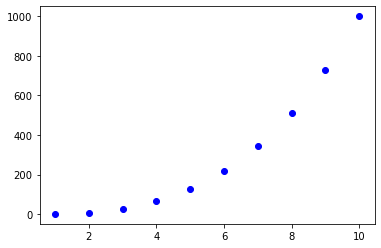

In [360]:
PlotPower(np.arange(1, 11), 3)


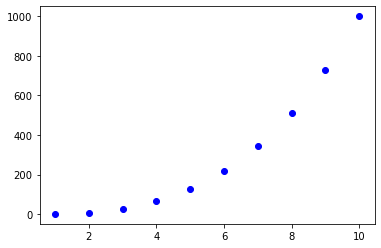

In [361]:
PlotPower(np.arange(1, 11), 3, x_scale = "log", y_scale = "log")


In [362]:
# Question 13
from sklearn.datasets import load_boston
df = load_boston()

In [363]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [364]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target # the Price column is available in other attribute called target.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [365]:
crim = (df['CRIM']>df['CRIM'].median()).map({False: 0, True: 1})
df['crim'] = crim
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,crim
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


In [366]:
df.corr()["crim"]

CRIM       0.409395
ZN        -0.436151
INDUS      0.603260
CHAS       0.070097
NOX        0.723235
RM        -0.156372
AGE        0.613940
DIS       -0.616342
RAD        0.619786
TAX        0.608741
PTRATIO    0.253568
B         -0.351211
LSTAT      0.453263
Price     -0.263017
crim       1.000000
Name: crim, dtype: float64

In [367]:
x = df[['INDUS','NOX','AGE','DIS','RAD', 'TAX']] # double brackets necessary
y = df['crim']
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state=1) 

In [368]:
lda_clf = lda()
lda_clf.fit(train_x, train_y)


LinearDiscriminantAnalysis()

In [369]:
accuracy_score(test_y, lda_clf.predict(test_x))

0.8188976377952756

In [370]:
lda_clf = lda()
lda_clf.fit(train_x, train_y)
accuracy_score(test_y, lda_clf.predict(test_x))

0.8188976377952756

In [371]:
logit = LogisticRegression()
logit.fit(train_x,train_y)
accuracy_score(test_y, logit.predict(test_x))

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8110236220472441

In [372]:
qda_clf = qda()
qda_clf.fit(train_x,train_y)
accuracy_score(test_y,qda_clf.predict(test_x))

0.8740157480314961

In [373]:
for k in range(1,100):
    knn_classes = knn(n_neighbors = k)
    knn_classes.fit(train_x, train_y)
    acc = knn_classes.score(test_x,test_y)
    print('K = {:3}, accuracy = {:.4f}'.format(k, acc))  # here, {:3} denotes gap between K= and number, {.4f} denotes 4 decimal places. You can leave those brackets blank also.
# Finding: Best accuracy = 0.9370 with K = 1

K =   1, accuracy = 0.9370
K =   2, accuracy = 0.9213
K =   3, accuracy = 0.9213
K =   4, accuracy = 0.9134
K =   5, accuracy = 0.9055
K =   6, accuracy = 0.9134
K =   7, accuracy = 0.8819
K =   8, accuracy = 0.8819
K =   9, accuracy = 0.8819
K =  10, accuracy = 0.8740
K =  11, accuracy = 0.8819
K =  12, accuracy = 0.8819
K =  13, accuracy = 0.8819
K =  14, accuracy = 0.8583
K =  15, accuracy = 0.8583
K =  16, accuracy = 0.8425
K =  17, accuracy = 0.8346
K =  18, accuracy = 0.8425
K =  19, accuracy = 0.8189
K =  20, accuracy = 0.8189
K =  21, accuracy = 0.8189
K =  22, accuracy = 0.8189
K =  23, accuracy = 0.8189
K =  24, accuracy = 0.8189
K =  25, accuracy = 0.8189
K =  26, accuracy = 0.8189
K =  27, accuracy = 0.8189
K =  28, accuracy = 0.8189
K =  29, accuracy = 0.8110
K =  30, accuracy = 0.8110
K =  31, accuracy = 0.8110
K =  32, accuracy = 0.8110
K =  33, accuracy = 0.8110
K =  34, accuracy = 0.8110
K =  35, accuracy = 0.8110
K =  36, accuracy = 0.8110
K =  37, accuracy = 0.8110
K